# **OBJECTIVE**

---



Gustavo just started an e-commerce startup based in Portugal that recently opened an online website to sell their product. Fortunately, Gustavo is launching  their website when the covid-19 hits and making  them grow faster than ever. However, Gustavo is still not using targeted marketing which hurts their marketing budget as only a fraction of their user comes back to their website. Gustavo needs help to increase their marketing conversion rate by doing more targeted marketing using customer segmentation so that it will not hurt their budget.

What will we do:
1. **EDA**
2. **RFM Analysis**
3. **Cluster Analysis**

# **DATA GATHERING**

---



The data used are as follows: 

  1. [**Order_payments_dataset**](https://docs.google.com/spreadsheets/d/1QBSiV1_-iZSl4eXf1x5PKdhApjylDZBAwpu5kyXgXiI/edit#gid=1536277203); This dataset includes data about the orders payment options. It consists of 5 columns as follows:
    * **Order id;** Unique identifier of an order.
    * **Payment sequential;** A customer may pay an order with more than one payment method. If he does so, a sequence will be created to.
    * **Payment type;** Method of payment chosen by the customer.
    * **Payment installments;** Number of installments chosen by the customer.
    * **Payment value;** Transaction value.

  2. [**Customers_dataset**](https://docs.google.com/spreadsheets/d/16PrjRWeMTHSDg1zuoZcSvRDHreSy3uapoJ29yW9YNGA/edit#gid=609911388); This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location. It consists of 5 columns as follows:
    * **Customer id;** Key to the orders dataset. Each order has a unique customer id.
    * **Customer unique id;** Unique identifier of a customer.
    * **Customer zip code prefix;** First five digits of customer zip code.
    * **Customer city;** Customer city name.
    * **Customer state;** Customer state.

  3. [**Orders_dataset**](https://docs.google.com/spreadsheets/d/13avihjRl143MNI2ov977ykybdv-1iGeBXVpT7s35orQ/edit#gid=1112523705); This is the core dataset. From each order you might find all other information. It consists of 8 columns as follows:
    * **Order id;** Unique identifier of the order.
    * **Customer id;** Key to the customer dataset. Each order has a unique customer_id.
    * **Order status;** Reference to the order status (delivered, shipped, etc).
    * **Order purchase timestamp;** Shows the purchase timestamp.
    * **Order approved at;** Shows the payment approval timestamp.
    * **Order delivered carrier date;** Shows the order posting timestamp. When it was handled to the logistic partner.
    * **Order delivered customer date;** Shows the actual order delivery date to the customer.
    * **Order estimated delivery date;** Shows the estimated delivery date that was informed to customer at the purchase moment.




# **PREPARATION**

---



## **Import Library**

**INSTALL DEPENDENCIES**

In [1]:
!pip install pandasql
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=c9c13df26fe5abaa8c0a2d43310b1c09130bd0247c90531ba8fa8f1a5c383336
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from datetime import datetime
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler

**SILHOUTTE LIBRARY**

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

**RFM TOOLS**

In [4]:
# RFM Analysis
# source: https://www.putler.com/rfm-analysis/

from pandasql import sqldf
pysqldfX = lambda q,ctx: sqldf(q, ctx)

class RFM():
  def __init__(self, 
        id_colname:str = 'id', 
        recency_colname:str = 'recency', 
        frequency_colname:str = 'frequency', 
        monetary_colname:str = 'monetary',
        num_cluster:int = 5
    ):
    self.id_colname = id_colname;
    self.recency_colname = recency_colname;
    self.frequency_colname = frequency_colname;
    self.monetary_colname = monetary_colname;
    self.num_cluster = num_cluster;
    #------------------------------------------
    self.dict_rfm_reference = {
      "Champions":{
        "Segment":"Champions",
        "Activity":"Bought recently, buy often and spend the most!",
        "Actionable":"Reward them. Can be early adopters for new products. Will promote your brand."
      },
      "Loyal Customers":{
        "Segment":"Loyal Customers",
        "Activity":"Spend good money with us often. Responsive to promotions.",
        "Actionable":"Upsell higher value products. Ask for reviews. Engage them."
      },
      "Potential Loyalist":{
        "Segment":"Potential Loyalist",
        "Activity":"Recent customers, but spent a good amount and bought more than once.",
        "Actionable":"Offer membership / loyalty program, recommend other products."
      },
      "Recent Customers":{
        "Segment":"Recent Customers",
        "Activity":"Bought most recently, but not often.",
        "Actionable":"Provide on-boarding support, give them early success, start building relationship."
      },
      "Promising":{
        "Segment":"Promising",
        "Activity":"Recent shoppers, but haven't spent much.",
        "Actionable":"Create brand awareness, offer free trials"
      },
      "Customers Needing Attention":{
        "Segment":"Customers Needing Attention",
        "Activity":"Above average recency, frequency and monetary values. May not have bought very recently though.",
        "Actionable":"Make limited time offers, Recommend based on past purchases. Reactivate them."
      },
      "About To Sleep":{
        "Segment":"About To Sleep",
        "Activity":"Below average recency, frequency and monetary values. Will lose them if not reactivated.",
        "Actionable":"Share valuable resources, recommend popular products / renewals at discount, reconnect with them."
      },
      "At Risk":{
        "Segment":"At Risk",
        "Activity":"Spent big money and purchased often. But long time ago. Need to bring them back!",
        "Actionable":"Send personalized emails to reconnect, offer renewals, provide helpful resources."
      },
      "Can't Lose Them":{
        "Segment":"Can't Lose Them",
        "Activity":"Made biggest purchases, and often. But haven't returned for a long time.",
        "Actionable":"Win them back via renewals or newer products, don't lose them to competition, talk to them."
      },
      "Hibernating":{
        "Segment":"Hibernating",
        "Activity":"Last purchase was long back, low spenders and low number of orders.",
        "Actionable":"Offer other relevant products and special discounts. Recreate brand value."
      },
      "Lost":{
        "Segment":"Lost",
        "Activity":"Lowest recency, frequency and monetary scores.",
        "Actionable":"Revive interest with reach out campaign, ignore otherwise."
      }
    };

    _segments = {
      "Champions":[555, 554, 544, 545, 454, 455, 445],
      "Loyal Customers":[543, 444, 435, 355, 354, 345, 344, 335],
      "Potential Loyalist":[553, 551,552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323],
      "Recent Customers":[512, 511, 422, 421, 412, 411, 311],
      "Promising":[525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413,414, 415, 315, 314, 313],
      "Customers Needing Attention":[535, 534, 443, 434, 343, 334, 325, 324],
      "About To Sleep":[331, 321, 312, 221, 213],
      "At Risk":[255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124],
      "Can't Lose Them":[155, 154, 144, 214,215,115, 114, 113],
      "Hibernating":[332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211],
      "Lost":[111, 112, 121, 131,141,151]
    }

    self.df_rfm_segmentation = {};
    for _segment in _segments.keys():
      for _rfm_score in _segments[_segment]:
        self.df_rfm_segmentation[str(_rfm_score)] = self.dict_rfm_reference[_segment];

    #------------------------------------------
    self.df_recency_model = None;
    self.df_frequency_model = None;
    self.df_monetary_model = None;
  
  def __get_rfm_dataset_query__(self)->str:
    return f"""
      select 
        "{self.id_colname}" as id, 
        "{self.recency_colname}" as recency,
        "{self.frequency_colname}" as frequency,
        "{self.monetary_colname}" as monetary 
      from df
    """;

  def extract_dataset(self,df_x):
    #step 0: extract the dataset
    str_query = self.__get_rfm_dataset_query__();
    df_rfm_dataset = pysqldfX(str_query,{"df":df_x});
    return df_rfm_dataset;

  def get_feature_clusters(self, df_rfm_dataset) -> pd.DataFrame:
    df_rfm_dataset['recency_score'] = pd.qcut(
        x=df_rfm_dataset['recency'].values,
        q=self.num_cluster, labels = False
    )+1;
    df_rfm_dataset['frequency_score'] = pd.qcut(
        x=df_rfm_dataset['frequency'].values,
        q=self.num_cluster, labels = False
    )+1;
    df_rfm_dataset['monetary_score'] = pd.qcut(
        x=df_rfm_dataset['monetary'].values,
        q=self.num_cluster, labels = False
    )+1;
    self.df_recency_model = pysqldfX("""
      select 'recency' as label, recency_score as score, min(recency) as min, max(recency) as max 
      from df group by recency_score order by recency_score asc
    """,{"df":df_rfm_dataset});
    self.df_frequency_model = pysqldfX("""
      select 'frequency' as label, frequency_score as score, min(frequency) as min, max(frequency) as max 
      from df group by frequency_score order by frequency_score asc
    """,{"df":df_rfm_dataset});
    self.df_monetary_model = pysqldfX("""
      select 'monetary' as label, monetary_score as score, min(monetary) as min, max(monetary) as max 
      from df group by monetary_score order by monetary_score asc
    """,{"df":df_rfm_dataset});

  def generate_sql_model(self, df_x):
    label = df_x['label'].unique()[0];
    _cache = [];
    row_counts = df_x.shape[0];
    for i in range(0, row_counts):
      if(i+1<row_counts):
        _cache.append(f"""when {label} <= {df_x['max'][i]} then {df_x['score'][i]}""");
      else:
        _cache.append(f"""when {label} > {df_x['max'][i-1]} then {df_x['score'][i]}""");
    _str = "\n".join(_cache);
    return f"""(case {_str} end) as {label}_score""";

  def score(self, df_x) -> pd.DataFrame:
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    str_query = f"""
      with tmp as (
        select df.*,
          {self.generate_sql_model(self.df_recency_model)},
          {self.generate_sql_model(self.df_frequency_model)},
          {self.generate_sql_model(self.df_monetary_model)}
        from df
      )
      select tmp.*, (recency_score||frequency_score||monetary_score) as rfm_score
      from tmp
    """;
    return pysqldfX(str_query,{"df":df_rfm_dataset});

  def label_samples(self, df_rfm_feature_scored) -> pd.DataFrame:
    label_ref = [];
    for i in range(0,df_rfm_feature_scored.shape[0]):
      label_ref.append(
          self.df_rfm_segmentation[str(df_rfm_feature_scored['rfm_score'][i])]
      );
    return pd.concat([df_rfm_feature_scored, pd.DataFrame(label_ref)],axis=1);

  def fit(self, df_x):
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    #step 1: divide each RFM feature into n buckets
    df_rfm_dataset = self.get_feature_clusters(df_rfm_dataset);

  def transform(self, df_x) -> pd.DataFrame:
    #step 2: score each feature based on model
    df_rfm_feature_scored = self.score(df_x);

    #step 3: map each row with their reference table
    df_rfm_feature_labeled = self.label_samples(df_rfm_feature_scored);

    return df_rfm_feature_labeled;

  def fit_transform(self, df_x: pd.DataFrame) -> pd.DataFrame :
    self.fit(df_x);
    return self.transform(df_x);

## **Import Dataset**

**Create Function to Transform CSV URL**

In [5]:
def transform_url(url):
  trf_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
  return trf_url

**Order Payments Dataset**

In [6]:
order_payments_url = transform_url('https://drive.google.com/file/d/1yjOSGPhTPW8KCvydszzjFXKH5xJ2zZqt/view?usp=sharing')
df_order_payments = pd.read_csv(order_payments_url)
df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


**Customers Dataset**

In [7]:
customers_url = transform_url('https://drive.google.com/file/d/1UrID_7MI4BUBZ9HPvywdL42mOGFTy9px/view')
df_customers = pd.read_csv(customers_url)
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**Orders Dataset**

In [8]:
orders_url = transform_url('https://drive.google.com/file/d/13n4zD1NB0RPowM9OZOz0vDB85NxGExF_/view?usp=sharing')
df_orders = pd.read_csv(orders_url)
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


# **DATA CLEANING**

---



## **Removing Irrelevant Values**

Irrelevant values are data that we do not need to answer our problem. There are 2 kinds of techniques:
* **Column-wise** : Removing columns that are not needed
* **Row-wise** : Deleting data records that do not match our problem criteria

### **Order Payments**

**1. Check Order Payments Columns**

In [9]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In this case, we do not need the **payment_sequential** column for analysis.

**2. Drop Irrelevant Columns**

In [10]:
df_op = df_order_payments.copy()
df_op.drop(['payment_sequential'],axis=1,inplace=True)
df_op

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45
...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,credit_card,5,369.54


There are now **4 columns** left that we will use for analysis. Next, we check if there are any data with typos or anomalous values.

**3. Check order_id Values**

If we look at the first and last 4 data, the character length in **order_id** is always 32. We can check if there is any data in **order_id** whose character length is not equal to 32.

In [11]:
df_op[df_op['order_id'].str.len() != 32]

,order_id,payment_type,payment_installments,payment_value


All values in **order_id** match the criteria.

**4. Check payment_type Values**

In [12]:
df_op['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

It can be seen that there is a payment type that is '**not_defined**'. Basically '**not_defined**' is not a payment type. So since the number is small, we can delete the data.

In [13]:
df_op = df_op[df_op['payment_type'] != 'not_defined']
df_op['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

**5. Check Range of payment_installments**

Payment installments are regular intervals over a period of time to make payments. For example, if the value is 3, then the customer makes make payments 3 times in 1 order. So all values in this column should not be less than 1. Now we check the range value of this column.

In [14]:
print(df_op['payment_installments'].min())
print(df_op['payment_installments'].max())

0
24


It can be seen that the range of values is **0 - 24**. This means that there is no negative value but there is still a value of 0. We need to delete that record.

In [15]:
df_op = df_op[df_op['payment_installments'] != 0]
print(df_op['payment_installments'].min())

1


Now the minimum payment value is **1**. This means that there is no longer a payment installments of 0. Next, we can compare the amount of initial data and data after removing irrelevant values.

In [16]:
print('The length of the data before removing irrelevant values: ', len(df_order_payments))
print('The length of the data after removing irrelevant values: ', len(df_op))
print('Percentage of deleted data: ', round((len(df_order_payments)-len(df_op))/len(df_order_payments)*100,2), '%')

The length of the data before removing irrelevant values:  103886
The length of the data after removing irrelevant values:  103881
Percentage of deleted data:  0.0 %


**6. Check Range of payment_value**

Next we check the value in the **payment_value** column. Payment value is the amount of payment made by the customer, so it cannot be negative and cannot be 0. We can check the value range of this column.

In [17]:
print(df_op['payment_value'].min())
print(df_op['payment_value'].max())

0.0
13664.08


It can be seen that the range of values is **0 - 13664.08**. This means that there is no negative value but there is still a value of 0. We need to delete that record.

In [18]:
df_op = df_op[df_op['payment_value'] != 0]
print(df_op['payment_value'].min())

0.01


Now the minimum payment value is **0.01**. This means that there is no longer a payment value of 0. Next, we can compare the amount of initial data and data after removing irrelevant values.

In [19]:
print('The length of the data before removing irrelevant values: ', len(df_order_payments))
print('The length of the data after removing irrelevant values: ', len(df_op))
print('Percentage of deleted data: ', round((len(df_order_payments)-len(df_op))/len(df_order_payments)*100,2), '%')

The length of the data before removing irrelevant values:  103886
The length of the data after removing irrelevant values:  103875
Percentage of deleted data:  0.01 %


### **Customers**

**1. Check Customers Columns**

In [20]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In this case, we do not need the **customer_zip_code_prefix** and **customer_city** column for analysis.

**2. Drop Irrelevant Columns**

In [21]:
df_cst = df_customers.copy()
df_cst.drop(['customer_zip_code_prefix','customer_city'],axis=1,inplace=True)
df_cst

,customer_id,customer_unique_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,RS


There are now **3 columns** left that we will use for analysis. Next, we check if there are any data with typos or anomalous values.

**3. Check customer_id Values**

The character length in **customer_id** is always 32, just like **order_id**. We can check if there is any data in **customer_id** whose character length is not equal to 32.

In [22]:
df_cst[df_cst['customer_id'].str.len() != 32]

,customer_id,customer_unique_id,customer_state


All values in **customer_id** match the criteria.

**4. Check customer_unique_id Values**

Just like **customer_id**, the character length in this column must also be 32 characters.

In [23]:
df_cst[df_cst['customer_unique_id'].str.len() != 32]

,customer_id,customer_unique_id,customer_state


All values in **customer_unique_id** match the criteria.

**5. Check customer_state Values**

In [24]:
df_cst['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

There are no typos or anomaly values in **customer_state**.

In [25]:
print('The length of the data before removing irrelevant values: ', len(df_customers))
print('The length of the data after removing irrelevant values: ', len(df_cst))
print('Percentage of deleted data: ', round((len(df_customers)-len(df_cst))/len(df_customers)*100,2), '%')

The length of the data before removing irrelevant values:  99441
The length of the data after removing irrelevant values:  99441
Percentage of deleted data:  0.0 %


### **Orders**

**1. Check Orders Columns**

In [26]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


There are 5 columns containing time data from each order process. But we only need customer data when making a purchase (**order_purchase_timestamp**). So we can drop the others.

**2. Drop Irrelevant Columns**

In [27]:
df_ord = df_orders.copy()
df_ord.drop(df_ord.columns.tolist()[4:8],axis=1,inplace=True)
df_ord

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27


There are now **4 columns** left that we will use for analysis. Next, we check if there are any data with typos or anomalous values.

**3. Check order_id and customer_id Values**

Just like before, the number of characters for **order_id** and **customer_id** must be 32.

In [28]:
df_ord[df_ord['order_id'].str.len() != 32]

,order_id,customer_id,order_status,order_purchase_timestamp


In [29]:
df_ord[df_ord['customer_id'].str.len() != 32]

,order_id,customer_id,order_status,order_purchase_timestamp


All values in **order_id** and **customer_id** match the criteria.

**4. Check order_status Values**

In [30]:
df_ord['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

We assume that valid income is on completed orders. So we only need data that has a '**delivered**' status. It can be seen that orders with '**delivered**' status amount to about **97%** of the data. So we can just drop the rest.

In [31]:
df_ord = df_ord[df_ord['order_status'] == 'delivered']
df_ord['order_status'].value_counts()

delivered    96478
Name: order_status, dtype: int64

Now that the **order_status** column is all '**delivered**', we can just drop the column.

In [32]:
df_ord.drop('order_status',axis=1,inplace=True)
df_ord

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27


There are now **3 columns** with **96478 records** left in this dataframe. We can also compare the number of data before and after removing irrelevant values.

In [33]:
print('The length of the data before removing irrelevant values: ', len(df_orders))
print('The length of the data after removing irrelevant values: ', len(df_ord))
print('Percentage of deleted data: ', round((len(df_orders)-len(df_ord))/len(df_orders)*100,2), '%')

The length of the data before removing irrelevant values:  99441
The length of the data after removing irrelevant values:  96478
Percentage of deleted data:  2.98 %


## **Handling Missing Values**

Empty data can prevent us from doing a good analysis. So we need to remove them or fill them with the right values.

First, check if there are any missing values among the columns.

In [34]:
for i in [df_op, df_cst, df_ord]:
  print(i.isna().sum(), '\n')

order_id                0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

customer_id           0
customer_unique_id    0
customer_state        0
dtype: int64 

order_id                    0
customer_id                 0
order_purchase_timestamp    0
dtype: int64 



It can be seen that there are **no missing values** in all columns, so we can do the next step.

## **Removing Duplicate Values**

Duplicate values will reduce the accuracy and quality of our analysis data. However, not all duplicate values must be removed, it depends on how the data content is.

### **Order Payments**

In [35]:
df_op.duplicated().sum()

613

There are **613** duplicated data in order payments. But as we know, some payment types can be used multiple times in 1 order, such as credit cards and vouchers. Next, we can check what payment types are in this duplicated data.

In [36]:
df_op_duplicated = df_op[df_op.duplicated()]
df_op_duplicated[['payment_type']].value_counts()

payment_type
voucher         601
credit_card      12
dtype: int64

It turns out that there are only 2 payment types in the duplicated data: **vouchers** and **credit cards**. So for certain cases, we still need this data if it is related to payment type analysis, so we don't need to delete it.

### **Customers**

To check duplicated data in customers, we only need to check if there is a repeated **customer_id**.

In [37]:
df_cst.duplicated('customer_id').sum()

0

There are **no duplicated data** in customers.

### **Orders**

Just like before, we only need to check if there is an repeated **order_id**  in the orders data.

In [38]:
df_ord.duplicated('order_id').sum()

0

There are **no duplicated data** in orders.

## **Remove Outliers**

Similar to duplicated values, another factor that can reduce the quality of our data analysis is outliers. We should either discard these outliers, or keep them for deeper analysis.

**1. Create Box Plot for payment_installments and payment_value**

Text(0.5, 1.0, 'Payment Value')

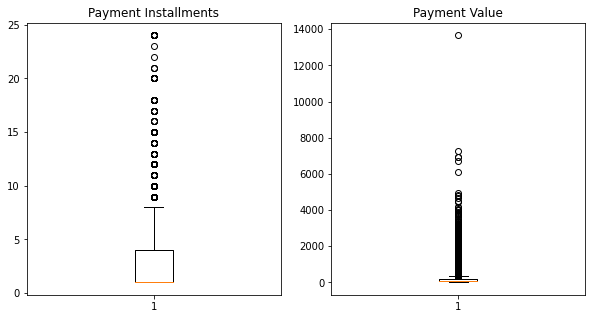

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

ax1.boxplot(df_op['payment_installments'])
ax1.set_title('Payment Installments')

ax2.boxplot(df_op['payment_value'])
ax2.set_title('Payment Value')

From the box plot results, it can be seen that there are **few outliers** in **payment installments** and **many outliers** in **payment values**. We can remove these outliers using the **IQR formula**.

**2a. Remove Outliers on Payment Installments**

In [40]:
Q1 = df_op['payment_installments'].quantile(0.25)
Q3 = df_op['payment_installments'].quantile(0.75)

IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower fence:',lower_fence)
print('Upper fence:',upper_fence)

Q1: 1.0
Q3: 4.0
IQR: 3.0
Lower fence: -3.5
Upper fence: 8.5


After calculating the lower and upper fence, we first count the number of outliers in our data.

In [41]:
df_op_full = len(df_op)
payment_installments_outliers = len(df_op[(df_op['payment_installments']<lower_fence) | (df_op['payment_installments']>upper_fence)])

print('The length of the data before remove outliers: ',df_op_full)
print('Number of outliers: ',payment_installments_outliers)
print('Percentage of outliers: ', round(payment_installments_outliers/df_op_full*100,2), '%')

The length of the data before remove outliers:  103875
Number of outliers:  6313
Percentage of outliers:  6.08 %


There are **6.08%** of our data that are outliers. Since the number is small, we can remove these data.

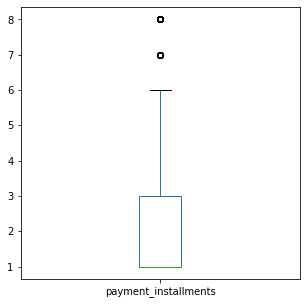

In [42]:
df_op = df_op[(df_op['payment_installments']>=lower_fence) & (df_op['payment_installments']<=upper_fence)]
df_op.boxplot(column=['payment_installments'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=True)

After we check again using the box plot, we can see that there are few outliers left. Now we compare the data before and after removing outliers.

In [43]:
print('The length of the data before remove outliers: ',df_op_full)
print('The length of the data after remove ouliers: ',len(df_op))

The length of the data before remove outliers:  103875
The length of the data after remove ouliers:  97562


**2b. Remove Outliers on Payment Value**

Next, we calculate the lower and upper fence of the payment value.

In [44]:
Q1 = df_op['payment_value'].quantile(0.25)
Q3 = df_op['payment_value'].quantile(0.75)

IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower fence:',lower_fence)
print('Upper fence:',upper_fence)

Q1: 54.51
Q3: 162.19
IQR: 107.68
Lower fence: -107.01000000000002
Upper fence: 323.71000000000004


Then we look at the number of outliers.

In [45]:
df_op_full = len(df_op)
payment_value_outliers = len(df_op[(df_op['payment_value']<lower_fence) | (df_op['payment_value']>upper_fence)])

print('The length of the data before remove outliers: ',df_op_full)
print('Number of outliers: ',payment_value_outliers)
print('Percentage of outliers: ', round(payment_value_outliers/df_op_full*100,2), '%')

The length of the data before remove outliers:  97562
Number of outliers:  6673
Percentage of outliers:  6.84 %


There are **6.84%** of our data that are outliers. Since the number is small, we can remove these data.

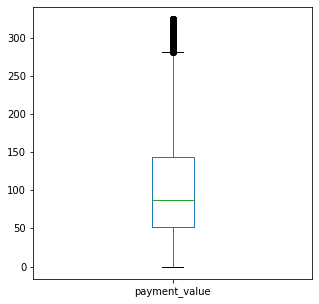

In [46]:
df_op = df_op[(df_op['payment_value']>=lower_fence) & (df_op['payment_value']<=upper_fence)]
df_op.boxplot(column=['payment_value'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=True)

We can see that there are few outliers left. Now we compare the data before and after removing outliers.

In [47]:
print('The length of the data before remove outliers: ',df_op_full)
print('The length of the data after remove ouliers: ',len(df_op))

The length of the data before remove outliers:  97562
The length of the data after remove ouliers:  90889


## **Converting Data Types**

When we import a dataset, python will automatically assign a data type that matches the data content. But not all data is given the right data type. And if the data type isn't right, we also can't do calculations on the data as we need. So we have to adjust it properly before doing the analysis.

**Check Data Types**

In [48]:
print(df_op.info())
print(df_cst.info())
print(df_ord.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90889 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              90889 non-null  object 
 1   payment_type          90889 non-null  object 
 2   payment_installments  90889 non-null  int64  
 3   payment_value         90889 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_state      99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column      

All data types in **df_order_payments** and in **df_customers** are normal. Whereas in **df_orders**, order_purchase_timestamp data type are still not correct. This columns have values in the form of date and time but still have an object data type. So we need to **convert them to datetime**.

In [49]:
df_ord['order_purchase_timestamp'] = pd.to_datetime(df_ord['order_purchase_timestamp'])
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96478 non-null  object        
 1   customer_id               96478 non-null  object        
 2   order_purchase_timestamp  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


After checking again, it can be seen that the **order_purchase_timestamp** column already has the correct data type.

## **Combine the Dataset Into Single Dataset**

After each dataset has been organized and cleaned, we must combine that data pieces into a complete dataframe to facilitate further analysis.

**Merge Orders and Order Payments**

In [50]:
merged_ord_op = df_ord.merge(df_op, how='left', on='order_id')
merged_ord_op

,order_id,customer_id,order_purchase_timestamp,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,credit_card,3.0,179.12
...,...,...,...,...,...,...
100511,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,credit_card,3.0,85.08
100512,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,credit_card,3.0,195.00
100513,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,credit_card,5.0,271.01
100514,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,NaN,NaN,NaN


**Merge the merged_ord_op and Customers**

In [51]:
merged_all = merged_ord_op.merge(df_cst, how='left', on='customer_id')
merged_all

,order_id,customer_id,order_purchase_timestamp,payment_type,payment_installments,payment_value,customer_unique_id,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,GO
...,...,...,...,...,...,...,...,...
100511,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,SP
100512,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,SP
100513,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,BA
100514,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,NaN,NaN,NaN,5097a5312c8b157bb7be58ae360ef43c,RJ


After successfully merging, then we double-check to make sure whether the data has been formed properly or not.

**Check The Merged Dataframe**

In [52]:
merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100516 entries, 0 to 100515
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  100516 non-null  object        
 1   customer_id               100516 non-null  object        
 2   order_purchase_timestamp  100516 non-null  datetime64[ns]
 3   payment_type              88257 non-null   object        
 4   payment_installments      88257 non-null   float64       
 5   payment_value             88257 non-null   float64       
 6   customer_unique_id        100516 non-null  object        
 7   customer_state            100516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 6.9+ MB


It turns out that there are several missing values in the data related to order payments. This means that there are some orders that do not have order payments recorded. We can delete these data because they cannot be used in future analysis.

In [53]:
merged_all.dropna(axis=0,inplace=True)
merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88257 entries, 0 to 100515
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  88257 non-null  object        
 1   customer_id               88257 non-null  object        
 2   order_purchase_timestamp  88257 non-null  datetime64[ns]
 3   payment_type              88257 non-null  object        
 4   payment_installments      88257 non-null  float64       
 5   payment_value             88257 non-null  float64       
 6   customer_unique_id        88257 non-null  object        
 7   customer_state            88257 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 6.1+ MB


With no missing values, the dataset is ready to be analyzed.

# **EXPLORATORY DATA ANALYSIS**

---



First, we must make a copy of the dataset that we have created for backing up. This must be done so that the clean data we create is not changed when doing the analysis.

In [54]:
df_merged = merged_all.copy()
df_merged.reset_index(inplace = True, drop = True)
df_merged

,order_id,customer_id,order_purchase_timestamp,payment_type,payment_installments,payment_value,customer_unique_id,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,GO
...,...,...,...,...,...,...,...,...
88252,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,2017-02-23 09:05:12,credit_card,3.0,155.99,831ce3f1bacbd424fc4e38fbd4d66d29,SP
88253,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,SP
88254,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,SP
88255,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,BA


Next, we use **df_merged** as a copy of the dataset to make adjustments when doing analysis.

## **Descriptive Statistics**

Descriptive analysis has different treatments for these 2 types of data:

1. **Numerical Data**
2. **Non-Numerical Data**

So we have to do it separately.

### **Numerical Data**

In [55]:
df_stat = df_merged[['payment_value','payment_installments']].describe()
df_stat.loc['skewness'] = df_merged[['payment_value','payment_installments']].skew()
df_stat.loc['kurtosis'] = df_merged[['payment_value','payment_installments']].kurt()
df_stat.loc['variance'] = df_merged[['payment_value','payment_installments']].var()
df_stat.loc['coefficient of variation'] = df_merged[['payment_value','payment_installments']].std()/df_merged[['payment_value','payment_installments']].mean()*100
df_stat = round(df_stat,2)
df_stat

,payment_value,payment_installments
count,88257.00,88257.00
mean,104.78,2.27
std,68.34,1.87
min,0.01,1.00
25%,52.13,1.00
50%,87.36,1.00
75%,143.83,3.00
max,323.70,8.00
skewness,0.98,1.54
kurtosis,0.43,1.55


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93b62aca90>,
      dtype=object)

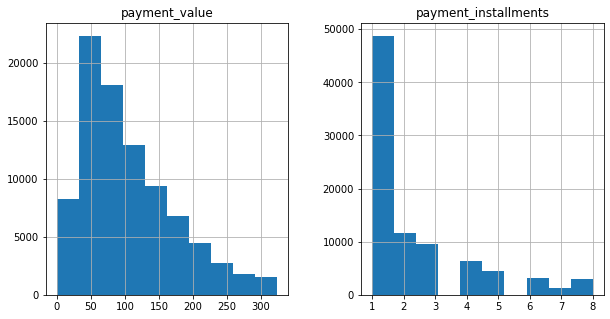

In [56]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df_merged[['payment_value','payment_installments']].hist(ax = ax)

**Payment Value**
*   This data is **moderately positive skewed** and has **leptokurtic kurtosis**, it means customers whose total payment value is smaller than the mean **(104.78)** are more dominant.
*   The data distribution are **heterogeneous** with variance data of the payment values are **65,22%** from the mean.

**Payment Installments**
*   This data is **hightly positive skewed** and has **leptokurtic kurtosis**, it means that very few customers use installment payments more than the mean **(2.27)**.
*   **More than 50%** of customers only use **1-time payment installments**.

### **Non-Numerical Data**

**1. Order and Customer Counts**

In [57]:
df_merged[['order_id','customer_unique_id']].describe()

,order_id,customer_unique_id
count,88257,88257
unique,84219,81763
top,ccf804e764ed5650cd8759557269dc13,9a736b248f67d166d2fbb006bcb877c3
freq,26,33


In [58]:
count = df_merged['order_id'].count()
order_unique = df_merged['order_id'].nunique()
customer_unique = df_merged['customer_unique_id'].nunique()
order_unique_percentage = str(round((count-order_unique)/count*100, 2)) + '%'
customer_unique_percentage = str(round((order_unique-customer_unique)/order_unique*100, 2)) + '%'
print(order_unique_percentage)
print(customer_unique_percentage)

4.58%
2.92%


*   There are **4.58%** of customers who make payments more than once in one order.
*   There are **2.92%** of customers who make order more than once.
*   The highest number of payments in one order is **26** times.
*   Customer **9a736b248f67d166d2fbb006bcb877c3** made payments **33** times (highest number).

**2. Datetime Data**

We can do a deeper analysis of datetime data by breaking it down into more specific parts.

In [59]:
df_merged['order_purchase_year'] = df_merged['order_purchase_timestamp'].dt.strftime('%Y')
df_merged['order_purchase_month'] = df_merged['order_purchase_timestamp'].dt.strftime('%B')
df_merged['order_purchase_quarter'] = df_merged['order_purchase_timestamp'].dt.quarter.astype(str)
df_merged['order_purchase_day'] = df_merged['order_purchase_timestamp'].dt.strftime('%d')
df_merged['order_purchase_weekday'] = df_merged['order_purchase_timestamp'].dt.strftime('%A')
df_merged['order_purchase_hour'] = df_merged['order_purchase_timestamp'].dt.strftime('%H')
df_merged.drop(['order_purchase_timestamp'],axis=1,inplace=True)
df_merged

,order_id,customer_id,payment_type,payment_installments,payment_value,customer_unique_id,customer_state,order_purchase_year,order_purchase_month,order_purchase_quarter,order_purchase_day,order_purchase_weekday,order_purchase_hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,SP,2017,October,4,02,Monday,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,SP,2017,October,4,02,Monday,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,SP,2017,October,4,02,Monday,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,BA,2018,July,3,24,Tuesday,20
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,GO,2018,August,3,08,Wednesday,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88252,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,credit_card,3.0,155.99,831ce3f1bacbd424fc4e38fbd4d66d29,SP,2017,February,1,23,Thursday,09
88253,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,SP,2017,March,1,09,Thursday,09
88254,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,SP,2018,February,1,06,Tuesday,12
88255,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,BA,2017,August,3,27,Sunday,14


Because we want to analyze the number of orders at a certain time, we need to have a dataset where there are no duplicate orders, or in SQL language we call SELECT DISTINCT. So we create a new dataframe where the duplicated order_id has been removed.

In [60]:
df_unique_order = df_merged.copy()
df_unique_order.drop_duplicates('order_id',inplace=True)
df_unique_order.reset_index(inplace = True, drop = True)
df_unique_order

,order_id,customer_id,payment_type,payment_installments,payment_value,customer_unique_id,customer_state,order_purchase_year,order_purchase_month,order_purchase_quarter,order_purchase_day,order_purchase_weekday,order_purchase_hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,SP,2017,October,4,02,Monday,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,BA,2018,July,3,24,Tuesday,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,GO,2018,August,3,08,Wednesday,08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,credit_card,1.0,72.20,7c142cf63193a1473d2e66489a9ae977,RN,2017,November,4,18,Saturday,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,credit_card,1.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,SP,2018,February,1,13,Tuesday,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84214,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,credit_card,3.0,155.99,831ce3f1bacbd424fc4e38fbd4d66d29,SP,2017,February,1,23,Thursday,09
84215,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,SP,2017,March,1,09,Thursday,09
84216,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,SP,2018,February,1,06,Tuesday,12
84217,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,BA,2017,August,3,27,Sunday,14


In [61]:
df_unique_order[df_unique_order.columns.tolist()[7:14]].describe()

,order_purchase_year,order_purchase_month,order_purchase_quarter,order_purchase_day,order_purchase_weekday,order_purchase_hour
count,84219,84219,84219,84219,84219,84219
unique,3,12,4,31,7,24
top,2018,August,2,24,Monday,16
freq,46617,9253,24997,3267,13707,5633


- The largest **annual sales** occurred in **2018**
- Largest **monthly sales** usually occur in **August**
- Largest **quarterly sales** usually occur in the **second quarter**
- Largest **daily sales in a month** usually occur on the **24th**
- Largest **daily sales in a week** usually occur on **Monday**
- Largest **hourly sales** usually occur at **4 p.m**.

**3. Payment Type**

In [62]:
df_merged[['payment_type']].describe()

,payment_type
count,88257
unique,4
top,credit_card
freq,63640


In [63]:
count = df_merged[['payment_type']].count()
credit_card = df_merged[df_merged['payment_type'] == 'credit_card']['payment_type'].count()
percentage = round(credit_card/count*100, 2).astype(str) + '%'
print(percentage)

payment_type    72.11%
dtype: object


**Credit cards** are the **most popular** type of payment. There are **72.11%** of customers use credit card.

**4. Customer State**

In [64]:
df_unique_order[['customer_state']].describe()

,customer_state
count,84219
unique,27
top,SP
freq,36265


In [65]:
count = df_unique_order[['customer_state']].count()
sao_paulo = df_unique_order[df_unique_order['customer_state'] == 'SP']['customer_state'].count()
percentage = round(sao_paulo/count*100, 2).astype(str) + '%'
print(percentage)

customer_state    43.06%
dtype: object


**Most sales** take place in **Sao Paulo** state with **43.06%** of total order.

## **Number of Orders per Month**

First, let's look at the total orders for each month as a whole (ignoring the year).

In [66]:
orders_per_month = df_unique_order.groupby(['order_purchase_month'])['order_id'].count()
orders_per_month = pd.DataFrame(orders_per_month)
orders_per_month.reset_index(inplace=True)
orders_per_month.columns = ['Month','Number of Orders']

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
orders_per_month['Month'] = pd.Categorical(orders_per_month['Month'], month_order)
orders_per_month.sort_values("Month", inplace=True)
orders_per_month

,Month,Number of Orders
4,January,6917
3,February,7280
7,March,8302
0,April,7975
8,May,8950
6,June,8072
5,July,8740
1,August,9253
11,September,3574
10,October,4107


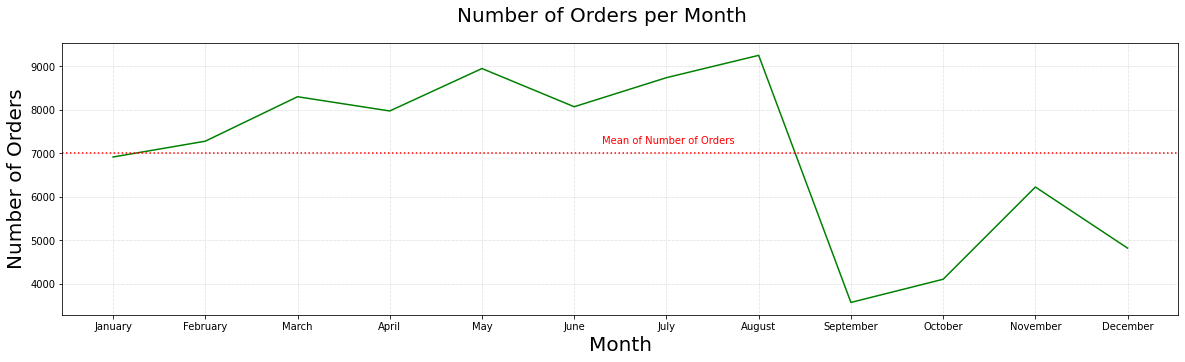

In [67]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Number of Orders per Month', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Orders', fontsize=20)

x = orders_per_month['Month']
y = orders_per_month['Number of Orders']
mean = y.mean()

plt.plot(x, y, color = 'green')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.axhline(y=mean, color='r', linestyle=':')
plt.text(0.5, 0.6, 'Mean of Number of Orders', transform=fig.transFigure, color='red')
plt.show()

It can be seen that the **most sales** occurred in **August**. But unfortunately **sales dropped** dramatically in the following month, **September**, and it can be seen that the lowest sales occurred in that month as well. To dig deeper into the causes of this occurrence, we can then break down our analysis by year.

In [68]:
orders_per_monthyear = df_unique_order.groupby(['order_purchase_year','order_purchase_month'])['order_id'].count()
orders_per_monthyear = pd.DataFrame(orders_per_monthyear)
orders_per_monthyear.reset_index(inplace=True)
orders_per_monthyear.columns = ['Year','Month','Number of Orders']

orders_per_monthyear['Month'] = pd.Categorical(orders_per_monthyear['Month'], month_order)
orders_per_monthyear.sort_values(['Year','Month'], inplace=True)
orders_per_monthyear

,Year,Month,Number of Orders
1,2016,October,212
0,2016,December,1
6,2017,January,622
5,2017,February,1425
9,2017,March,2205
2,2017,April,1972
10,2017,May,2995
8,2017,June,2721
7,2017,July,3307
3,2017,August,3625


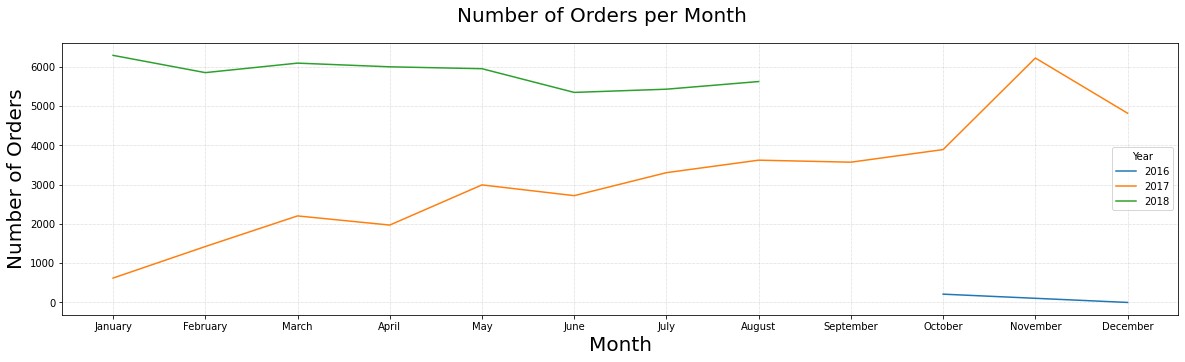

In [69]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Number of Orders per Month', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Orders', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.lineplot(data=orders_per_monthyear, x="Month", y="Number of Orders", hue="Year")
plt.show()

It turns out that our **monthly data is incomplete**, as seen in **2016** there is only data for **October and December**, while in **2018** there is only data for **January to August**. This is what causes sales in **September to December to appear to be declining.**

From the chart we can also see that **monthly sales in 2018** were **much greater than in 2017**.

Furthermore, we can also see if there is a pattern on certain dates in each month where there is an increase in sales.

In [70]:
month_daily_orders = df_unique_order.groupby(['order_purchase_month','order_purchase_day'])['order_id'].count()
month_daily_orders = pd.DataFrame(month_daily_orders)
month_daily_orders.reset_index(inplace=True)
month_daily_orders.columns = ['Month','Day','Number of Orders']

month_daily_orders['Month'] = pd.Categorical(month_daily_orders['Month'], month_order)
month_daily_orders.sort_values(["Month","Day"], inplace=True)
month_daily_orders

,Month,Day,Number of Orders
120,January,01,69
121,January,02,185
122,January,03,197
123,January,04,220
124,January,05,207
...,...,...,...
87,December,27,151
88,December,28,130
89,December,29,119
90,December,30,83


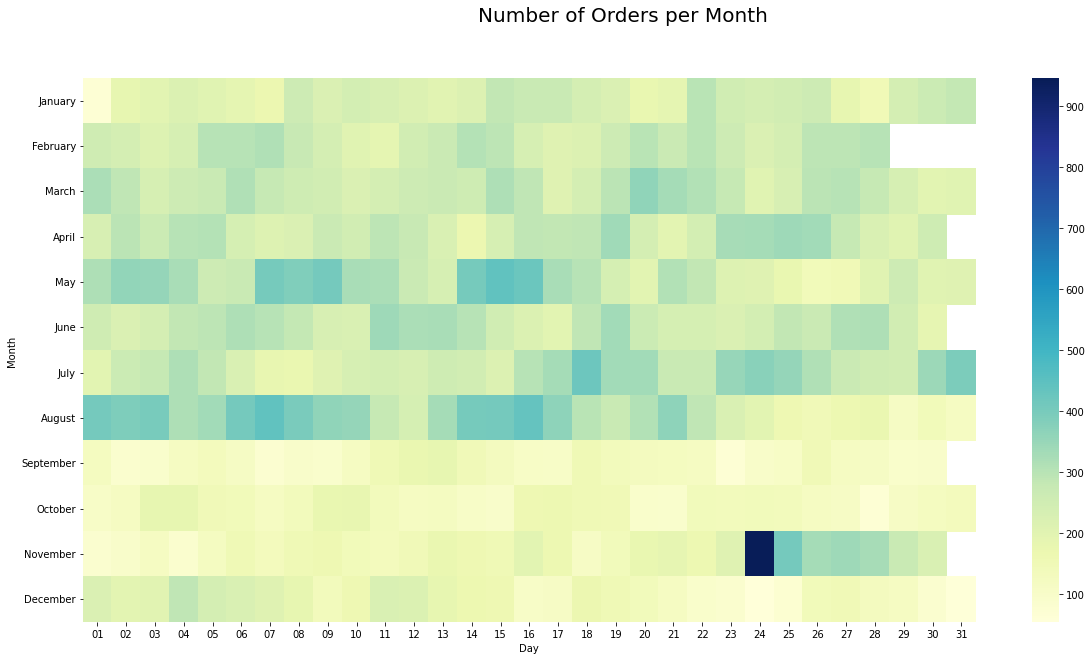

In [71]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Number of Orders per Month', fontsize=20)
map = month_daily_orders.pivot("Month", "Day", "Number of Orders")
sns.heatmap(map, cmap="YlGnBu")

- Sales are brisk in the **first and second weeks** of **May and August**, and the **third and fourth weeks** of **July**.
- There was also a **significant spike in sales** on the **24th of November**.

## **Daily Orders Trend**

In [72]:
daily_orders = df_unique_order.groupby(['order_purchase_weekday'])['order_id'].count()
daily_orders = pd.DataFrame(daily_orders)
daily_orders.reset_index(inplace=True)
daily_orders.columns = ['Weekday','Number of Orders']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_orders['Weekday'] = pd.Categorical(daily_orders['Weekday'], weekday_order)
daily_orders.sort_values("Weekday", inplace=True)
daily_orders

,Weekday,Number of Orders
1,Monday,13707
5,Tuesday,13567
6,Wednesday,13194
4,Thursday,12519
0,Friday,11890
2,Saturday,9139
3,Sunday,10203


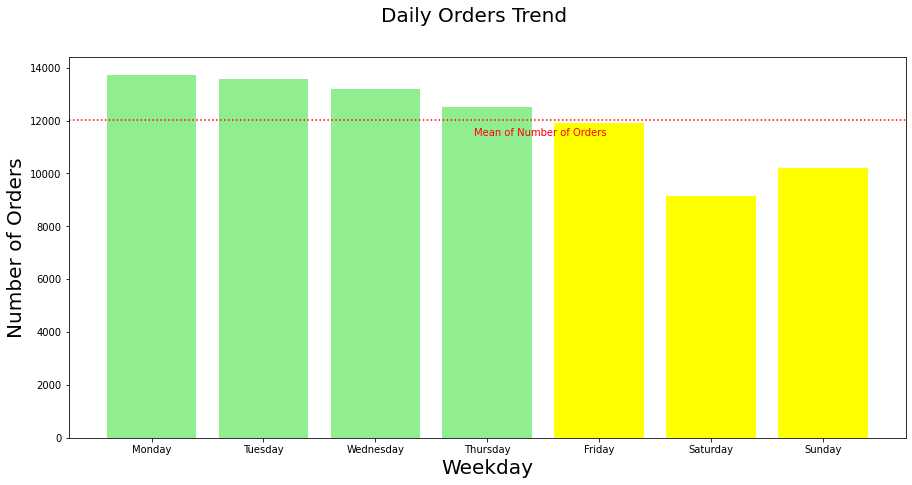

In [73]:
fig = plt.figure(figsize=(15, 7))

fig.suptitle('Daily Orders Trend', fontsize=20)
plt.xlabel('Weekday', fontsize=20)
plt.ylabel('Number of Orders', fontsize=20)

x = daily_orders['Weekday']
y = daily_orders['Number of Orders']
mean = y.mean()

colors = []
for value in daily_orders['Number of Orders']:
    if value < mean:
        colors.append('yellow')
    else:
        colors.append('lightgreen')

plt.bar(x, y, color=colors)
plt.axhline(y=mean, color='r', linestyle=':')
plt.text(0.5, 0.725, 'Mean of Number of Orders', transform=fig.transFigure, color='red')
plt.show()

- **Monday** is the **busiest day**
- It can be seen that sales on **Monday-Thursday** are **above average**, while on **the weekend** there is a **decrease in orders**.

In [74]:
hourly_orders = df_unique_order.groupby(['order_purchase_weekday','order_purchase_hour'])['order_id'].count()
hourly_orders = pd.DataFrame(hourly_orders)
hourly_orders.reset_index(inplace=True)
hourly_orders.columns = ['Weekday','Hour','Number of Orders']

hourly_orders['Weekday'] = pd.Categorical(hourly_orders['Weekday'], weekday_order)
hourly_orders.sort_values(["Weekday","Hour"], inplace=True)
hourly_orders

,Weekday,Hour,Number of Orders
24,Monday,00,281
25,Monday,01,120
26,Monday,02,58
27,Monday,03,28
28,Monday,04,20
...,...,...,...
91,Sunday,19,770
92,Sunday,20,829
93,Sunday,21,757
94,Sunday,22,761


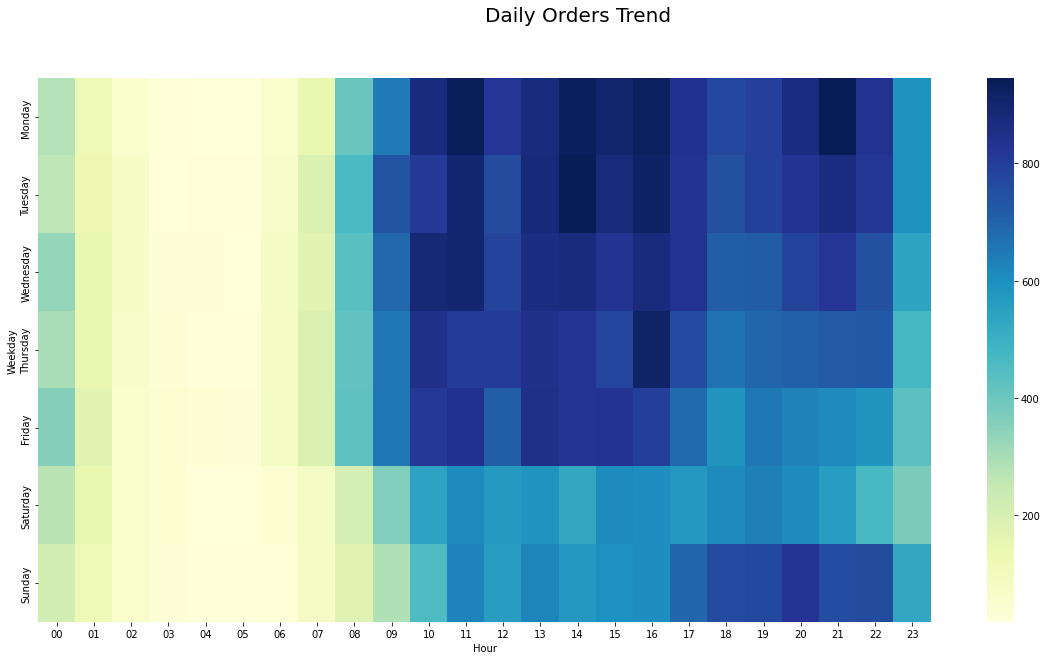

In [75]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Daily Orders Trend', fontsize=20)
map = hourly_orders.pivot("Weekday", "Hour", "Number of Orders")
sns.heatmap(map, cmap="YlGnBu")

- Sales mostly occur on **Monday - Friday at 10:00-16:00**.
- Sales in the evening (**17.00-22.00**) occur only on **Monday - Wednesday** and **Sunday**.
- Customers **rarely make purchases** during the hours of **02:00-06:00**.

## **Percentage of Orders per Payment Type**

In [76]:
orders_per_payment = df_merged.groupby(['payment_type'])['order_id'].count()
orders_per_payment = pd.DataFrame(orders_per_payment)
orders_per_payment.reset_index(inplace=True)
orders_per_payment.columns = ['Payment Type','Number of Orders']
orders_per_payment.sort_values('Number of Orders', ascending=False, inplace=True)
orders_per_payment

,Payment Type,Number of Orders
1,credit_card,63640
0,boleto,17811
3,voucher,5408
2,debit_card,1398


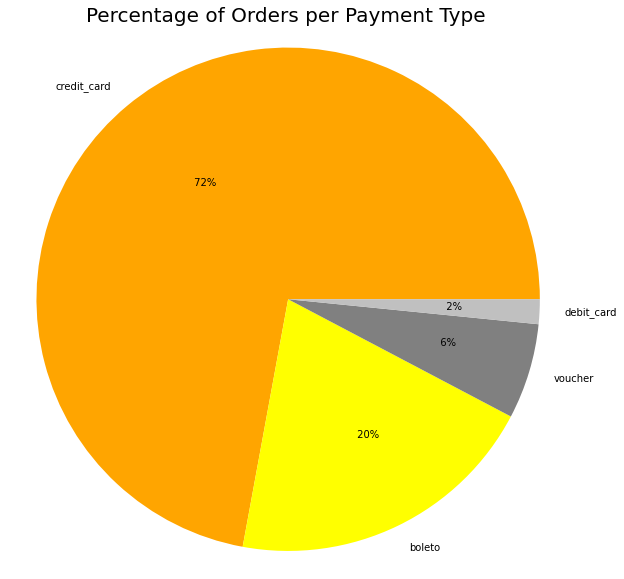

In [77]:
plt.figure(figsize=(10, 10))

data = orders_per_payment['Number of Orders']
labels = orders_per_payment['Payment Type']

plt.pie(data,labels=labels,autopct='%11.f%%',colors=('orange','yellow','grey','silver'))
plt.title('Percentage of Orders per Payment Type', fontsize=20)
plt.axis('equal')
plt.show()

It can be seen that **72%** of customers use **credit cards** as a means of payment. So we can do special promotions using credit cards for upselling. But before that, we can check the revenue earned from each type of payment, does credit card also provide a large revenue?

In [78]:
revenue_per_payment = df_merged.groupby(['payment_type'])['payment_value'].sum()
revenue_per_payment = pd.DataFrame(revenue_per_payment)
revenue_per_payment.reset_index(inplace=True)
revenue_per_payment.columns = ['Payment Type','Revenue']
revenue_per_payment.sort_values('Revenue', ascending=False, inplace=True)
revenue_per_payment

,Payment Type,Revenue
1,credit_card,6939109.90
0,boleto,1867523.27
3,voucher,296447.38
2,debit_card,144120.04


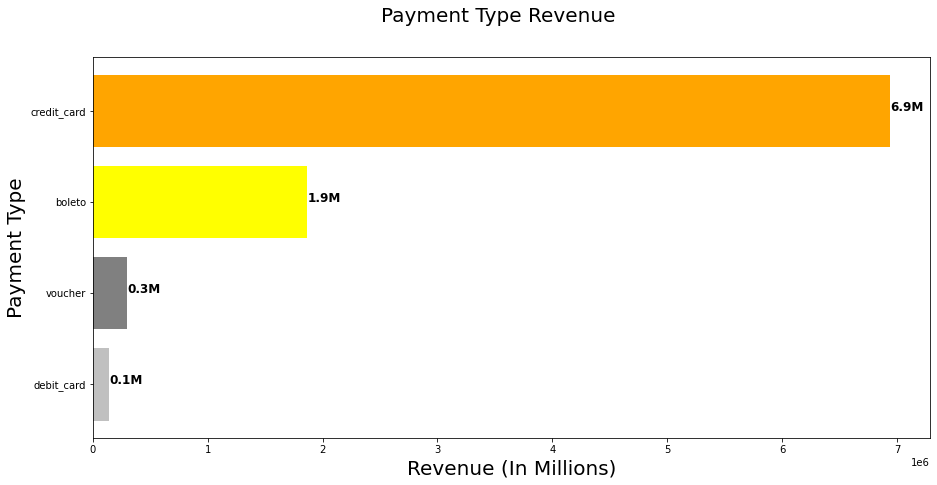

In [79]:
fig = plt.figure(figsize=(15, 7))

fig.suptitle('Payment Type Revenue', fontsize=20)
plt.xlabel('Revenue (In Millions)', fontsize=20)
plt.ylabel('Payment Type', fontsize=20)

revenue_per_payment.sort_values('Revenue', ascending=True, inplace=True)
x = revenue_per_payment['Payment Type']
y = revenue_per_payment['Revenue']

for i, v in enumerate(y):
    vmil = round(v/1000000,1)
    plt.text(v + 5, i, str(vmil)+'M', fontweight='bold', fontsize=12)

plt.barh(x, y, color=('silver','grey','yellow','orange'))
plt.show()

It turns out that the **revenue generated by each payment** type is **directly proportional** to the **number of orders**. It can be seen that **we get more revenue** from **credit card** payments with a total of **6.9M**. More than half of our total revenue. Therefore, it seems very appropriate to **focus promos on people who use credit cards** to increase our revenue.

# **RFM ANALYSIS**

---



**Recency-Frequency-Monetary** (RFM) analysis is a straightforward method for **customer segmentation** based on behavior. Based on their past purchases—how lately, frequently, and in what amounts—it segments customers.

- **Recency (R)**: Number of days since last purchase
- **Frequency (F)**: The total number of purchases
- **Monetary (M)**: The total money customer spent

The customer earns more points if the purchase was recent. He receives a greater score if he makes several purchases. Additionally, he earns additional points if he spends a lot of money.

## **Clustering**

### **Data Preparation**

Before doing segmentation, of course, we must find the recency, frequency, and monetary values. To get the **recency** value, we have to restore the **order_purchase_timestamp** column that we deleted earlier.

In [80]:
df = df_merged.merge(df_orders[['order_id','order_purchase_timestamp']], how='left', on='order_id')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df

,order_id,customer_id,payment_type,payment_installments,payment_value,customer_unique_id,customer_state,order_purchase_year,order_purchase_month,order_purchase_quarter,order_purchase_day,order_purchase_weekday,order_purchase_hour,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,SP,2017,October,4,02,Monday,10,2017-10-02 10:56:33
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,SP,2017,October,4,02,Monday,10,2017-10-02 10:56:33
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,SP,2017,October,4,02,Monday,10,2017-10-02 10:56:33
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,BA,2018,July,3,24,Tuesday,20,2018-07-24 20:41:37
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,GO,2018,August,3,08,Wednesday,08,2018-08-08 08:38:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88252,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,credit_card,3.0,155.99,831ce3f1bacbd424fc4e38fbd4d66d29,SP,2017,February,1,23,Thursday,09,2017-02-23 09:05:12
88253,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,SP,2017,March,1,09,Thursday,09,2017-03-09 09:54:05
88254,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,SP,2018,February,1,06,Tuesday,12,2018-02-06 12:58:58
88255,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,BA,2017,August,3,27,Sunday,14,2017-08-27 14:46:43


Assume **today is the day of the last recorded purchase date** on the dataset. Then we calculate the recency value by calculating the difference between today's date and the date the customer made the purchase.

In [81]:
last_purchase = datetime.strptime(max(df_orders['order_purchase_timestamp']), '%Y-%m-%d %H:%M:%S')
df['recency'] = (last_purchase - df['order_purchase_timestamp']).dt.days
df

,order_id,customer_id,payment_type,payment_installments,payment_value,customer_unique_id,customer_state,order_purchase_year,order_purchase_month,order_purchase_quarter,order_purchase_day,order_purchase_weekday,order_purchase_hour,order_purchase_timestamp,recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,SP,2017,October,4,02,Monday,10,2017-10-02 10:56:33,380
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,SP,2017,October,4,02,Monday,10,2017-10-02 10:56:33,380
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,SP,2017,October,4,02,Monday,10,2017-10-02 10:56:33,380
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,BA,2018,July,3,24,Tuesday,20,2018-07-24 20:41:37,84
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,GO,2018,August,3,08,Wednesday,08,2018-08-08 08:38:49,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88252,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,credit_card,3.0,155.99,831ce3f1bacbd424fc4e38fbd4d66d29,SP,2017,February,1,23,Thursday,09,2017-02-23 09:05:12,601
88253,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,SP,2017,March,1,09,Thursday,09,2017-03-09 09:54:05,587
88254,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,SP,2018,February,1,06,Tuesday,12,2018-02-06 12:58:58,253
88255,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,BA,2017,August,3,27,Sunday,14,2017-08-27 14:46:43,416


Then to get the **frequency** value we can use the **order_id** column, while for **monetary** we can use the **payment_value** column.

### **Data Aggregation**

Techniques:
1. The **recency** value of each customer is obtained from the **smallest recency** value from the dataset.
2. The **frequency** value of each customer is obtained from the **count of orders** they place.
3. The **monetary** value of each customer is obtained from the **sum of the payment** value they pay.

In [82]:
df_rfm = df.groupby(
                        'customer_unique_id'
                    ).agg(
                        recency=pd.NamedAgg(column='recency', aggfunc='min'),
                        frequency=pd.NamedAgg(column='order_id', aggfunc='count'),
                        monetary=pd.NamedAgg(column='payment_value', aggfunc='sum')
                    ).reset_index()
df_rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...,...
81758,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32
81759,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
81760,ffff371b4d645b6ecea244b27531430a,617,1,112.46
81761,ffff5962728ec6157033ef9805bacc48,168,1,133.69


Then we look at the data distribution of each RFM.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


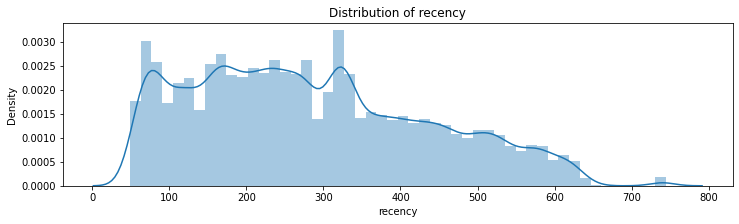

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


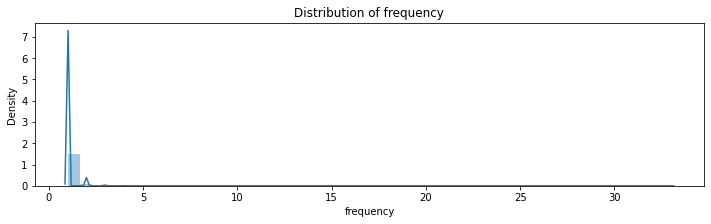

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


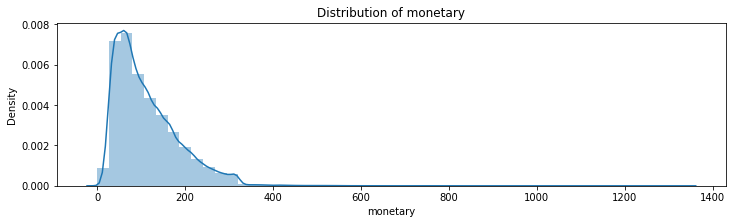

In [83]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(df_rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

All data looks **right-skewed**. However, the **frequency distribution** shows that the data is **only centered on one value**. Most of the customers have a frequency value of **1**. So this greatly affects the calculation of the value in each quartile and creates an error when using the available functions. So we need to do manual scoring for the frequency column.

### **Scoring**

The **qcut** function will calculate the score in a column according to the quartile calculation, the output is a range of 1-5. The customer earns more points if the purchase was recent. He receives a greater score if he makes several purchases. Additionally, he earns additional points if he spends a lot of money.

In [84]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

df_rfm['recency_score'] = pd.qcut(df_rfm['recency'], q=5, labels=r_labels).astype('int')

df_rfm.loc[df_rfm['frequency'] <= 5, 'frequency_score'] = 1
df_rfm.loc[df_rfm['frequency'] > 5, 'frequency_score'] = 2
df_rfm.loc[df_rfm['frequency'] > 10, 'frequency_score'] = 3
df_rfm.loc[df_rfm['frequency'] > 15, 'frequency_score'] = 4
df_rfm.loc[df_rfm['frequency'] > 20, 'frequency_score'] = 5

df_rfm['frequency_score'] = df_rfm['frequency_score'].astype('int')
df_rfm['monetary_score'] = pd.qcut(df_rfm['monetary'], q=5, labels=m_labels).astype('int')

df_rfm

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1,1,3
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,2,1,5
...,...,...,...,...,...,...,...
81758,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32,3,1,4
81759,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58,3,1,3
81760,ffff371b4d645b6ecea244b27531430a,617,1,112.46,1,1,3
81761,ffff5962728ec6157033ef9805bacc48,168,1,133.69,4,1,4


Next **concatenate all of the scores** into one, for example: 3-4-1 (R-F-M), and then sort the customers based on those numbers. Using a set of rules applied to R-F-M scores, **segment your consumer base**. There are **11 groups** created by it, such as "Loyal Customers," "Customers Needing Attention," and "Hibernating."

In [85]:
df_rfm['rfm_score'] = df_rfm['recency_score'].astype('str') + df_rfm['frequency_score'].astype('str') + df_rfm['monetary_score'].astype('str')
df_rfm

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1,1,3,113
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,2,1,5,215
...,...,...,...,...,...,...,...,...
81758,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32,3,1,4,314
81759,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58,3,1,3,313
81760,ffff371b4d645b6ecea244b27531430a,617,1,112.46,1,1,3,113
81761,ffff5962728ec6157033ef9805bacc48,168,1,133.69,4,1,4,414


### **Labelling**

After getting the RFM score, then we **do the labeling** by calling the function that has been provided (**rfm.label_samples()**). We can see the rules and details of each segment in the RFM code snippet in the '**Import Library**' section.

In [86]:
rfm = RFM(
    id_colname ='customer_unique_id',
    recency_colname = 'recency', 
    frequency_colname = 'frequency', 
    monetary_colname = 'monetary'
);

df_rfm_labelled = rfm.label_samples(df_rfm)
df_rfm_labelled

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,Segment,Activity,Actionable
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,4,1,4,414,Promising,"Recent shoppers, but haven't spent much.","Create brand awareness, offer free trials"
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4,1,1,411,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1,1,3,113,Can't Lose Them,"Made biggest purchases, and often. But haven't...","Win them back via renewals or newer products, ..."
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,2,1,1,211,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,2,1,5,215,Can't Lose Them,"Made biggest purchases, and often. But haven't...","Win them back via renewals or newer products, ..."
...,...,...,...,...,...,...,...,...,...,...,...
81758,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32,3,1,4,314,Promising,"Recent shoppers, but haven't spent much.","Create brand awareness, offer free trials"
81759,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58,3,1,3,313,Promising,"Recent shoppers, but haven't spent much.","Create brand awareness, offer free trials"
81760,ffff371b4d645b6ecea244b27531430a,617,1,112.46,1,1,3,113,Can't Lose Them,"Made biggest purchases, and often. But haven't...","Win them back via renewals or newer products, ..."
81761,ffff5962728ec6157033ef9805bacc48,168,1,133.69,4,1,4,414,Promising,"Recent shoppers, but haven't spent much.","Create brand awareness, offer free trials"


Then we check the **segment distribution** using **recency vs. monetary**.

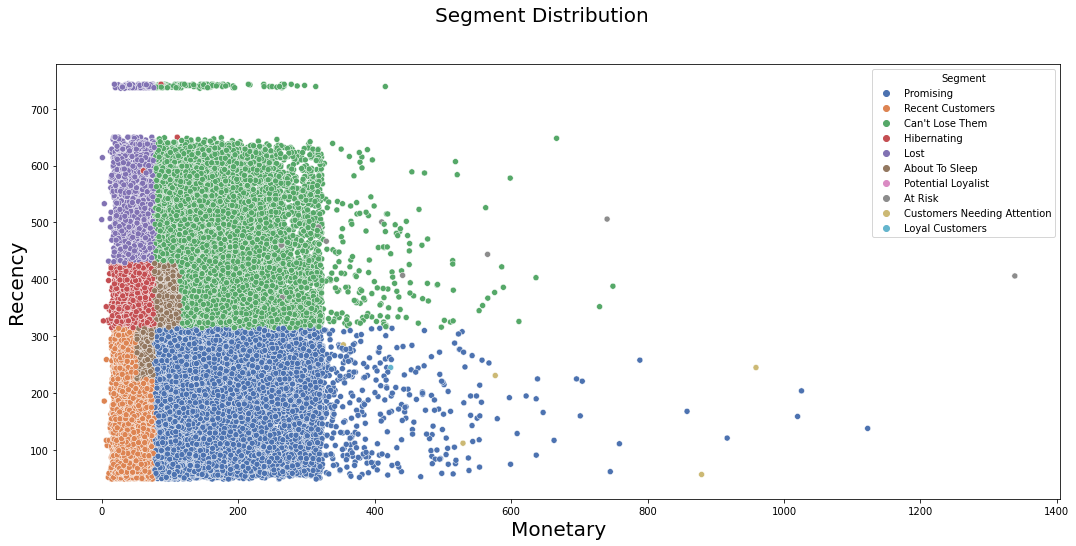

In [96]:
fig, ax = plt.subplots(figsize=(18,8))
fig.suptitle('Segment Distribution', fontsize=20)
plt.xlabel('Monetary', fontsize=20)
plt.ylabel('Recency', fontsize=20)
sns.scatterplot(data=df_rfm_labelled, x="monetary", y="recency", hue="Segment", palette="deep")
plt.show()

**Segmentation is successful**. Now we have mapped our customers to groups according to RFM rules. We can also see the nature of each customer and what actions we should take against that customer.

## **Analysis**

Now let's look at the **total customers** and the **average value of each RFM** in **each segment**.

In [ ]:
agg_dict = {
    'customer_unique_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}

df_analysis = df_rfm_labelled.groupby('Segment').agg(agg_dict).reset_index()
df_analysis.rename({'Segment': 'label', 'customer_unique_id': 'count'}, axis=1, inplace=True)
df_analysis['count %'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary %'] = df_analysis['monetary'] / df_analysis['monetary'].sum()
df_analysis.sort_values(by='count', ascending=False, inplace=True)
df_analysis

In [ ]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + ' %'].apply(lambda x: ' ({0:.2f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(18,8))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

- **Most of our customers** are in the "**Promising**", "**Recent Customers**", and "**Can't Lose Them**".
- While **very few** of our customers are in the **high score segmentation** (Loyal Customers and Potential Loyalists).
- **Most of our revenue** comes from the segment of "**Customers Needing Attention**" and "**Loyal Customers**" which there are very few.

## **Recommendation**

If we look at the **number of customers**, we can see that some of our customers fall into the "**Promising**", "**Recent Customers**", and "**Can't Lose Them**" segmentations. Then the things we can do:
- Create brand awareness, offer free trials
- Provide on-boarding support, give them initial success, start building a relationship
- Win them back through updates or newer products, don't lose them to the competition, talk to them.

If we look at the **amount of revenue** provided by our customers, it can be seen that the segmentation that provides the greatest value is "**Customers Needing Attention**" and "**Loyal Customers**", so to retain them we can do:
- Make limited time offers, Recommend based on past purchases. Reactivate them.
- Upsell higher value products. Ask for reviews. Engage them.

# **CLUSTER ANALYSIS**

---



Next, we try to do user clustering **based on their home state**. So we can see the characteristics of customers in each state.

## **Clustering**

### **Data Aggregation**

First, we create aggregated data of the features we want to use in clustering. There are 4 features:
- **Total Order**
- **Total Customer**
- **Payment Installments**
- **Payment Value**

Since the distribution of payment installments and payment value data is positively skewed, we use the **median** as the middle value.

In [ ]:
df_cluster = df_merged.groupby(
                          'customer_state'
                      ).agg(
                          total_order=pd.NamedAgg(column='order_id', aggfunc='nunique'),
                          total_customer=pd.NamedAgg(column='customer_unique_id', aggfunc='nunique'),
                          median_payment_installments=pd.NamedAgg(column='payment_installments', aggfunc='median'),
                          median_payment_value=pd.NamedAgg(column='payment_value', aggfunc='median')
                      ).reset_index()
df_cluster.set_index('customer_state', drop=True, inplace=True)
df_cluster

### **Standardize**

Next we **standardize the aggregation value** before we calculate the cluster number.

In [ ]:
scaler = MinMaxScaler()
std_data = df_cluster.copy()
std_data[:] = scaler.fit_transform(df_cluster[:])
std_data

### **Determine Cluster Number**

There are two techniques we can use to calculate the cluster number:
- **Elbow Method**
- **Silhoutte Method**

**Elbow Method**

In [ ]:
distortions = []
length = round(len(std_data)/2)
K = range(1,length)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(std_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-',color='gold')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Using this method, we can see that **the best cluster number is 3**. We can use the silhoutte method to confirm it.

**Silhoutte Method**

In [ ]:
silhoutte_analysis(std_data,list(range(2,length)))

It can be seen that the **highest score is at n_cluster = 3**. Then it can be confirmed that the **best cluster number is 3**.

### **Implement Clustering**

Then we can implement clustering by using the best cluster number that we have obtained earlier.

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df_cluster['cluster'] = cluster_label
df_cluster.sort_values('cluster', ascending=False)

## **Cluster Interpretation**

To interpret each cluster, we can see its nature according to the **descriptive statistics of each feature** that we determined earlier.

### **Total Order**

In [ ]:
df_cluster.groupby(['cluster'])['total_order'].agg(['count','sum','mean','min','max'])

**Interpretation**:
- **0** : Small total order
- **1** : Huge total order
- **2** : Moderate total order

### **Total Customer**

In [ ]:
df_cluster.groupby(['cluster'])['total_customer'].agg(['count','sum','mean','min','max'])

**Interpretation**:
- **0** : Small total customer
- **1** : Huge total customer
- **2** : Moderate total customer

### **Payment Installments**

In [ ]:
df_cluster.groupby(['cluster'])['median_payment_installments'].agg(['count','sum','mean','min','max'])

**Interpretation**:
- **0** : Prefer to make installments
- **1** : Prefer to pay in full
- **2** : Prefer to pay in full

### **Payment Value**

In [ ]:
df_cluster.groupby(['cluster'])['median_payment_value'].agg(['count','sum','mean','min','max'])

**Interpretation**:
- **0** : Top spender
- **1** : Low spender
- **2** : Moderate spender

### **Interpretation Summary**

From the descriptive analysis above, we can conclude:
- Cluster 0: Has a **small number of customers**, but generates a **large revenue**. Customers prefer to make installments (**payment more than once**)
- Cluster 1 : Have a **large number of customers**, but provide **small revenue**. Customers prefer to make **one-time payments** only.
- Cluster 2 : Have a **balanced number of customers and revenue**.

## **Recommendation**

**Overall**:
- Daily sales are busy on Monday, we can give special promotions on that day such as "Monday Sale"
- Hoirly sales are busy at 10:00-16:00, we can put advertisements or promotions at these times.
- Credit card is the most popular type of payment, we can provide special promotions for customers who use credit cards.
- Most of our customers are in Sao Paulo, we can intensify large promos there
- Do marketing according to the RFM segmentation that has been done

**For Cluster 0**:
- Give referral promos so that the number of customers can increase
- Give special promos for large purchases, because customers here like to shop at high prices.
- Make it easy to pay in installments

**For Cluster 1**:
- No need to do promotions that acquire new users
- Do upselling with bundle purchases, because customers in this cluster tend not to shop often
- Make it easy to pay in full

**For cluster 2**:
- Focus on the general recommendations above (Overall)